# Distributions
This notebook explores 8 distributions, their equations, and the way they change when their parameters are manipulated. 

Everything here is based on the information laid out in Chapter 3, of the book [Computer Vision: Models, Learning, and Inference](http://www.computervisionmodels.com/).

These distributions are useful because almost all models for computer vision can be interpreted in a probabilistic context.

## Why?
This is because, in CV, the 3D world is projected onto a 2D set of measurements. However, it is not exact and there is noise. This noise must be described, and probability is used for that. Furthermore,the relationship between world and measurements is generally many to one: there are many real-world configurations that are compatible with the same measurements. The chance that each of these possible worlds is present can also be described using probability.

# The Distributions
* Bernoulli Distribution]
* Beta Distribution
* Categorical Distribution
* Dirichlet Distribution
* Univariate Normal Distribution
* Normal-scaled inverse gamma distribution
* Multivariate Normal distribution
* Normal inverse wishart distribution

In [1]:
from scipy.stats import bernoulli, beta, gamma, invgamma, invwishart
from ipywidgets import interact, interactive, fixed, interact_manual
from functools import reduce
from matplotlib import ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.gridspec as gridspec
import seaborn as sns

np.random.seed(42)

# Bernoulli Distribution
* Discrete
* Models binary trials
* Describes the situation where there are only two possible outcomes
* $x \in {0,1}$
* Single parameter, $\lambda$ which defines the probability of observing a success $x=1$

Can be expressed as:
$$
\begin{array}{l}{\operatorname{Pr}(x=0)=1-\lambda} \\ {\operatorname{Pr}(x=1)=\lambda}\end{array}
$$

Or alternatively:
$$
\operatorname{Pr}(x)=\lambda^{x}(1-\lambda)^{1-x}
$$

Or:
$$
\operatorname{Pr}(x)=\operatorname{Bern}_{x}[\lambda]
$$

* In CV the Bernoulli distribution could be used to model the data, e.g.: it might describe the probability of a pixel taking an intensity value of greater or less than 128. (thresholding) Alternatively, it could be used to model the state of the world, for instance it could describe the probability that a face is present or absent in the image.

In [2]:
def bern(𝜆):
    data_bern = bernoulli.rvs(size=1000,p=𝜆)
    ax = sns.distplot(data_bern,kde=True,color='crimson',hist_kws={"linewidth": 25,'alpha':1})
    ax.set(xlabel='Bernoulli', ylabel='Frequency')

In [3]:
interact(bern, 𝜆=(0.0001,1.0001,0.01));

interactive(children=(FloatSlider(value=0.5001, description='λ', max=1.0001, min=0.0001, step=0.01), Output())…

# Beta Distribution
* Continuous distribution defined on single variable 𝜆 where $\lambda \in [0,1]$
* Used for representing uncertainty in the parameter $\lambda$ of the Bernoulli distribution
* Has parameters $(\alpha, \beta)$ whose values determine the expected value so $$
\mathrm{E}[\lambda]=\alpha /(\alpha+\beta)
$$
* $\alpha, \beta \in (0,∞)$

Beta distribution is represented as:
$$
\operatorname{Pr}(\lambda)=\frac{\Gamma[\alpha+\beta]}{\Gamma[\alpha] \Gamma[\beta]} \lambda^{\alpha-1}(1-\lambda)^{\beta-1}
$$

In [4]:
def Beta(𝛼,𝛽):
    data_beta = beta.rvs(𝛼, 𝛽, size=1000)
    ax = sns.distplot(data_beta,kde=True,color='crimson',hist_kws={"linewidth": 25,'alpha':1})
    ax.set(xlabel='Beta Distribution', ylabel='Probability')

In [5]:
interact(Beta, 𝛼=(0.0000001,10.0000001), 𝛽=(0.0000001,10.0000001));

interactive(children=(FloatSlider(value=5.0000001, description='α', max=10.0000001, min=1e-07), FloatSlider(va…

# Categorical Distribution
* Discrete distribution that determines the probability of observing one of $k$ possible outcomes
* The probabilities of observing the $K$ outcomes are held in a $K$ x $1$ parameter vector $\mathbf{\lambda} = [\lambda_1,\lambda_2,...,\lambda_k]$ where $\lambda_k \in [0,1]$ and $\sum^k_{k=1} \lambda_k =1 $
* Can be visualised as a normalised histogram with $K$ bins, and can be written as:
$$
\operatorname{Pr}(x=k)=\lambda_{k}
$$
or:
$$
\operatorname{Pr}(x)=\operatorname{Cat}_{x}[\boldsymbol{\lambda}]
$$

* In CV the intensity data at a pixel is usually quantized into discrete levels and so can be modeled with a categorical distribution.

In [6]:
dataset=sns.load_dataset('tips')
data = dataset['sex']
init_male = data[data=='Male'].count()
total = data.count()
init_female = data[data=='Female'].count()
print("Initially M:",init_male,"F:",init_female,"Total:",total)

Initially M: 157 F: 87 Total: 244


In [7]:
def categorical(i, male, female):
    if i > male:
        difference = i - male
        male = i
        female = female - difference
    else:
        difference = male - i
        male = i
        female = female + difference
    mp = male/total
    fp = female/total
    m = plt.bar('Male',mp, color='g',label='Male')
    f = plt.bar('Female',fp, color='r', label='Female')
    plt.xlabel('Gender')
    plt.ylabel('Probability')
    plt.title('Categorical Data')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def draw_cat(num_men):
    categorical(num_men,init_male,init_female)

In [8]:
interact(draw_cat, num_men=(0,244,1));

interactive(children=(IntSlider(value=122, description='num_men', max=244), Output()), _dom_classes=('widget-i…

# Dirichlet Distribution
* Defined by $K$ continuous values $\lambda_1 ... \lambda_k \text{ where } \lambda_k \in [0,1] \text{ and } \sum_{k=1}^k \lambda_k = 1$
* Hence it is suitable for **defining a distribution over the parameters of the categorical distribution**
* In $K$ dimensions the Dirichlet distribution has $K$ parameters each of which can take an positve values. The relative values of the parameters determine the expected values $E[\lambda_1]...E[\lambda_k]$. 
* The absolute value determines the concentration around the expected value, we write:

$$
\operatorname{Pr}\left(\lambda_{1 \ldots K}\right)=\frac{\Gamma\left[\sum_{k=1}^{K} \alpha_{k}\right]}{\prod_{k=1}^{K} \Gamma\left[\alpha_{k}\right]} \prod_{k=1}^{K} \lambda_{k}^{\alpha_{k}-1}
$$
Or for short:
$$
\operatorname{Pr}\left(\lambda_{1 \ldots K}\right)=\operatorname{Dir}_{\lambda_{1} \ldots K}\left[\alpha_{1 \ldots K}\right]
$$

* As the Bernoulli distribution was a special case of the categorical distribution with two possible outcomes, so the beta distribution is a special case of the Dirichlet distribution where the dimensionality is two

The majority of the below codeblock is taken from a [Gisthub Repo](https://gist.github.com/agitter/46b2169a035ad25b5d2b024a00344d54) - by Thomas Boggs. It was slightly modified to work with the newer version of python, and the interactive framework.

In [9]:
'''Functions for drawing contours of Dirichlet distributions.'''

# Author: Thomas Boggs

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.

    Arguments:

        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).

    Arguments:

        `dist`: A distribution instance with a `pdf` method.

        `border` (bool): If True, the simplex border is drawn.

        `nlevels` (int): Number of contours to draw.

        `subdiv` (int): Number of recursive mesh subdivisions to create.

        kwargs: Keyword args passed on to `plt.triplot`.
    '''

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
#         plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.

    Arguments:

        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.

        `barycentric` (bool): Indicates if `X` is in barycentric coords.

        `border` (bool): If True, the simplex border is drawn.

        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
#         plt.hold(1)
        plt.triplot(_triangle, linewidth=1)


def draw_dirichlet(a,b,c):
    alphas= [a,b,c]
    dist = Dirichlet(alphas)
    draw_pdf_contours(dist)
    title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alphas)
    plt.title(title, fontdict={'fontsize': 8})
    plot_points(dist.sample(5000))


In [10]:
interact(draw_dirichlet, a=(0.0000001,15.0000001), b=(0.0000001,15.0000001),c=(0.0000001,15.0000001));

interactive(children=(FloatSlider(value=7.5000001, description='a', max=15.0000001, min=1e-07), FloatSlider(va…

# Univariate Normal Distribution
* Defined on continuous values $x \in [-inf,inf]$
* Two parameters, mean $\mu$ and the variance $\sigma^2$
* Parameter $\mu$ can take any value and determines the position of the peak
* The parameter $\sigma^2$ takes only positive values and determines the width of the distribution.

Defined as:
$$
\operatorname{Pr}(x)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left[-0.5(x-\mu)^{2} / \sigma^{2}\right]
$$

Abbreviate to:
$$
\operatorname{Pr}(x)=\operatorname{Norm}_{x}\left[\mu, \sigma^{2}\right]
$$

* In CV it is common to ignore the fact that the intensity of a pixel is quantized and model it with the continuous normal distribution. The world state may also be described by the normal distribution. e.g.: the distance to an object could be represented in this way.

In [11]:
def univariate_normal(𝜇, var):
    value = np.random.normal(loc=𝜇,scale=var,size=1000)
    sns.distplot(value)
    plt.xlabel("Value")
    plt.ylabel("Probability")
    plt.title("Univariate Normal Distribution")

In [12]:
interact(univariate_normal, 𝜇=(-100,100), var=(0.0000001,15.0000001));

interactive(children=(IntSlider(value=0, description='μ', min=-100), FloatSlider(value=7.5000001, description=…

# Normal-Scaled Inverse Gamma
* Defined over a pair of continuous values $\mu, \sigma^2$, the first of which can take any value, the second of which is constrained to be positive
* It can define a distribution over the mean and variance parameters of the normal distribution
* Four parameters $\alpha, \beta, \gamma, \delta$ where $\alpha, \beta, \gamma$ are positive real numbers but $\delta$ can take any value.
* Its pdf is:
$$
\operatorname{Pr}\left(\mu, \sigma^{2}\right)=\frac{\sqrt{\gamma}}{\sigma \sqrt{2 \pi}} \frac{\beta^{\alpha}}{\Gamma[\alpha]}\left(\frac{1}{\sigma^{2}}\right)^{\alpha+1} \exp \left[-\frac{2 \beta+\gamma(\delta-\mu)^{2}}{2 \sigma^{2}}\right]
$$

For short:
$$
\operatorname{Pr}\left(\mu, \sigma^{2}\right)=\text { NormInvGam }_{\mu, \sigma^{2}}[\alpha, \beta, \gamma, \delta]
$$

In [13]:
# mesh
def inverse_gamma(𝛼,𝛽):
    """
    According to this http://spencerlyon.com/2015/01/07/canonical-probability-distributions-in-python/
    The scale is the beta variable  in the scipy.stats.ingamma distribution
    """
    x = np.linspace(invgamma.ppf(0.01, 𝛼),invgamma.ppf(0.99, 𝛼), 100)
    plt.plot(x, invgamma.pdf(x=x,a=𝛼, scale=𝛽),'r-', lw=5, alpha=0.6, label='invgamma pdf')
    plt.title("Normal-scaled inverse gamma distribution")
    plt.xlabel("Mean")
    plt.ylabel("Standard Deviation")
    plt.show()

This one is a bit weird, I couldn't find a way to accurately represent it with all four parameters

In [14]:
interact(inverse_gamma,𝛼=(0.0001,10.0001),𝛽=(0.0001,10.0001));

interactive(children=(FloatSlider(value=5.0001, description='α', max=10.0001, min=0.0001), FloatSlider(value=5…

In [15]:
def inverse_gamma(a,b,g,d,var,mean):
    """
    From first principles
    """
    first_term  = math.sqrt(g)/math.sqrt(var)
    
    sec_term = math.pow(b,a)/gamma.rvs(a)
    
    third_term = math.pow((1/var),(a+1))
    
    fourth_term = -((2*b + g*math.pow((d-mean),2))/(2*var))
    
    return first_term * sec_term * third_term * math.exp(fourth_term)


"""
Here I try to mimic what is on page 41 of the textbook
"""
x = []
y= []
val = []
for i in range(-5,5):
    for j in range(1,5):
        x.append(i)
        y.append(j)
        val.append(inverse_gamma(1,1,1,0,j,i))

# Multivariate Normal Distribution
* Models $D$-dimensional variables $x$ where each of the $D$ elements $x_1 ... x_D$ is continuous and lies in the range $[-\infin,+\infin]$
* The univariate normal is a special case of the multivariate normal, where the number of elements of $D$ is one. 
* Has two parameters, mean $\mu$ and covariance $\Sigma$.
* $\mu$ is a $D$ x $1$ vector that describes the mean of the distribution.
$\Sigma$ is a symmetric $D$ x $D$ positive definite matrix so that $z^T\Sigma z$ is positive for any real vector $z$.
* The PDF is as follows:
$$
\operatorname{Pr}(\mathbf{x})=\frac{1}{(2 \pi)^{D / 2}|\boldsymbol{\Sigma}|^{1 / 2}} \exp \left[-0.5(\mathbf{x}-\boldsymbol{\mu})^{T} \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right]
$$

Or for short:
$$
Pr(x) = Norm_x[\mu,\Sigma]
$$

* In CV the multivariate normal might model the joint distribution of the intensities of $D$ pixels within a region of the image. The state of the world might also be described by this distribution. E.g.: the multivariate normal might describe the joint uncertainty in the 3D position $(x,y,z)$ of an object in the scene.

The following codeblock is based on of this very helpful [blogpost](https://peterroelants.github.io/posts/multivariate-normal-primer/) by Peter Roelants

In [16]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [17]:
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)


def draw_multi(mean):
    # subplot
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    d = 2  # number of dimensions

    # Plot of independent Normals
    bivariate_mean = np.matrix([[mean], [mean]])  # Mean
    bivariate_covariance = np.matrix([
        [1., 0.], 
        [0., 1.]])  # Covariance
    x1, x2, p = generate_surface(
        bivariate_mean, bivariate_covariance, d)
    # Plot bivariate distribution
    con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
    ax1.set_xlabel('$x_1$', fontsize=13)
    ax1.set_ylabel('$x_2$', fontsize=13)
    ax1.axis([-2.5, 2.5, -2.5, 2.5])
    ax1.set_aspect('equal')
    ax1.set_title('Independent variables', fontsize=12)

    # Plot of correlated Normals
    bivariate_mean = np.matrix([[0.], [mean]])  # Mean
    bivariate_covariance = np.matrix([
        [1., 0.8], 
        [0.8, 1.]])  # Covariance
    x1, x2, p = generate_surface(
        bivariate_mean, bivariate_covariance, d)
    # Plot bivariate distribution
    con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
    ax2.set_xlabel('$x_1$', fontsize=13)
    ax2.set_ylabel('$x_2$', fontsize=13)
    ax2.axis([-2.5, 2.5, -1.5, 3.5])
    ax2.set_aspect('equal')
    ax2.set_title('Correlated variables', fontsize=12)

    # Add colorbar and title
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(con, cax=cbar_ax)
    cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
    plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
    plt.show()

Need to consider how to draw with different covariances

In [18]:
# use a,b,c and in the covariance matrix and then that should rotate and flex out 
interact(draw_multi,mean=(-2,2));

interactive(children=(IntSlider(value=0, description='mean', max=2, min=-2), Output()), _dom_classes=('widget-…

# Normal Inverse Wishart Distribution
* Define a distribution over a $D \text{ x } 1$ vector $\mu$ and a $D \text{ x } D$ positive definite matrix $\Sigma$
* Suitable for describing uncertainty in the parameters of a multivariate normal distribution
* Has four parameters $\alpha, \Psi, \gamma, \delta$, where $\alpha$ and $\gamma$ are positive scalars, $\delta$ is a $D$ x $1$ vector and $\Psi$ is a positive definite $D$ x $D$ matrix. 

$$
\operatorname{Pr}(\boldsymbol{\mu}, \boldsymbol{\Sigma})=\frac{\gamma^{D / 2}|\boldsymbol{\Psi}|^{\alpha / 2} \exp \left[-0.5\left(\operatorname{Tr}\left[\boldsymbol{\Psi} \boldsymbol{\Sigma}^{-1}\right]+\gamma(\boldsymbol{\mu}-\boldsymbol{\delta})^{T} \boldsymbol{\Sigma}^{-1}(\boldsymbol{\mu}-\boldsymbol{\delta})\right)\right]}{2^{\alpha D / 2}(2 \pi)^{D / 2}|\mathbf{\Sigma}|^{(\alpha+D+2) / 2} \Gamma_{D}[\alpha / 2]}
$$

Where $\Gamma_d[]$ is the multivariate gamma function and $Tr[\Psi]$ returns the trace of the matrix $\Psi$, for short we write:
$$
Pr(\mu, \Sigma) = NorIWis_{\mu,\Sigma}[\alpha, \Psi, \gamma, \delta]
$$

* This is opaque. However, it is a function that produces a positive value for any valid mean vector $\mu$ and covariance matrix $\Sigma$, such that when we integrate over all possible values of $\mu$ and $\Sigma$ the answer is one

* It is hard to visualize, but easy to draw samples and examine them. Each sample is the mean and covariance of a normal distribution.

* [This resource](https://datamicroscopes.github.io/niw.html) goes through how one can use it to learn the underlying parameters of a dataset.

Below simply shows how the inverse gamma and inverse wishart distribution are similar:

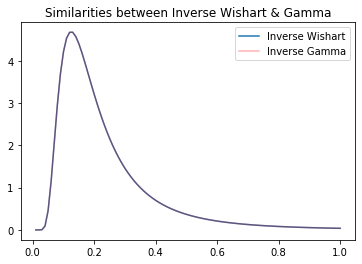

The first three data points of each
Wishart: [1.20546865e-15 5.42497807e-06 4.45813929e-03]
Gamma: [1.20546865e-15 5.42497807e-06 4.45813929e-03]


In [19]:
x = np.linspace(0.01, 1, 100)
iw = invwishart.pdf(x, df=6, scale=1)
ig = invgamma.pdf(x, 6/2., scale=1./2)
plt.plot(x, iw,label="Inverse Wishart")
plt.plot(x,ig,'-r',label="Inverse Gamma",alpha=0.3)
plt.legend()
plt.title("Similarities between Inverse Wishart & Gamma")
plt.show()
print("The first three data points of each")
print("Wishart:",iw[:3])
print("Gamma:",ig[:3])